In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import adam, SGD
from keras import regularizers
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
df = pd.read_csv('data/combined_subjects7.csv', index_col=0)
subject_id_list = df['subject'].unique()


In [3]:
feats_all =   ['BVP_mean', 'BVP_std', 'BVP_min', 'BVP_max',
           'EDA_phasic_mean', 'EDA_phasic_std', 'EDA_phasic_min', 'EDA_phasic_max', 'EDA_smna_mean',
           'EDA_smna_std', 'EDA_smna_min', 'EDA_smna_max', 'EDA_tonic_mean',
           'EDA_tonic_std', 'EDA_tonic_min', 'EDA_tonic_max', 'Resp_mean',
           'Resp_std', 'Resp_min', 'Resp_max', 'TEMP_mean', 'TEMP_std', 'TEMP_min',
           'TEMP_max', 'TEMP_slope', 'BVP_peak_freq','BVP_peaks_cnt','Resp_peak_cnt','subject', 'label']

feats_without_EDA =   ['BVP_mean', 'BVP_std', 'BVP_min', 'BVP_max','Resp_mean','Resp_std', 'Resp_min', 'Resp_max', 'TEMP_mean', 'TEMP_std', 'TEMP_min',
           'TEMP_max', 'TEMP_slope', 'BVP_peak_freq','BVP_peaks_cnt','Resp_peak_cnt','subject', 'label']

feats_EDA = ['EDA_phasic_mean', 'EDA_phasic_std', 'EDA_phasic_min', 'EDA_phasic_max', 'EDA_smna_mean',
           'EDA_smna_std', 'EDA_smna_min', 'EDA_smna_max', 'EDA_tonic_mean',
           'EDA_tonic_std', 'EDA_tonic_min', 'EDA_tonic_max','subject', 'label']
df=df[feats_all]

In [4]:
subjects = df['subject'].unique()

In [5]:
x=df.drop(columns=['label'])
y=df['label']

In [6]:
def get_binary_label(label):
    if label == 0 or label == 1:
        return 0
    else:
        return 1
    

In [7]:
y = y.apply(get_binary_label)

In [8]:
hs={}
preds={}
clr={}
for i in subjects:
    x_train=x[x['subject']!=i]
    x_test=x[x['subject']==i]
    y_train=y[x['subject']!=i]
    y_test=y[x['subject']==i]
    
    Y=keras.utils.to_categorical(y_train)
    
    opt = adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True)
    model = Sequential()
    model.add(Dense(256, input_dim=x_train.shape[1], activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(1024, activation='relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))
    model.add(Dense(units= 2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    print("Subject ",i)
    history = model.fit(x_train, Y, epochs=50, batch_size=95, verbose=2, validation_split=0.2)
    y_predited = model.predict(x_test)

    pred = list()
    for j in range(len(y_predited)):
        pred.append(np.argmax(y_predited[j]))
    
    preds[i]=pred
    hs[i]=history
    print(classification_report(pred,y_test))
    a=classification_report(pred,y_test,target_names=['Non-Stress','Stress'],output_dict=True)
    clr[i]=a



Subject  2
Train on 2680 samples, validate on 671 samples
Epoch 1/50
 - 2s - loss: 8.7585 - accuracy: 0.5799 - val_loss: 2.1941 - val_accuracy: 0.6513
Epoch 2/50
 - 1s - loss: 3.1435 - accuracy: 0.6340 - val_loss: 2.1394 - val_accuracy: 0.6647
Epoch 3/50
 - 1s - loss: 2.6671 - accuracy: 0.6358 - val_loss: 2.0541 - val_accuracy: 0.6870
Epoch 4/50
 - 1s - loss: 2.4769 - accuracy: 0.6672 - val_loss: 2.0499 - val_accuracy: 0.6751
Epoch 5/50
 - 1s - loss: 2.4003 - accuracy: 0.6668 - val_loss: 1.9916 - val_accuracy: 0.6662
Epoch 6/50
 - 1s - loss: 2.2788 - accuracy: 0.6787 - val_loss: 1.9478 - val_accuracy: 0.6706
Epoch 7/50
 - 1s - loss: 2.1905 - accuracy: 0.6810 - val_loss: 1.9243 - val_accuracy: 0.6706
Epoch 8/50
 - 1s - loss: 2.1624 - accuracy: 0.6847 - val_loss: 1.8720 - val_accuracy: 0.6900
Epoch 9/50
 - 1s - loss: 2.0306 - accuracy: 0.6929 - val_loss: 1.8477 - val_accuracy: 0.6885
Epoch 10/50
 - 1s - loss: 1.9554 - accuracy: 0.7142 - val_loss: 1.8005 - val_accuracy: 0.7422
Epoch 11/50

Epoch 34/50
 - 1s - loss: 1.0851 - accuracy: 0.9298 - val_loss: 1.3141 - val_accuracy: 0.8299
Epoch 35/50
 - 1s - loss: 1.0550 - accuracy: 0.9425 - val_loss: 1.3143 - val_accuracy: 0.8239
Epoch 36/50
 - 1s - loss: 1.0442 - accuracy: 0.9432 - val_loss: 1.3045 - val_accuracy: 0.8239
Epoch 37/50
 - 1s - loss: 1.0311 - accuracy: 0.9421 - val_loss: 1.3130 - val_accuracy: 0.8224
Epoch 38/50
 - 1s - loss: 1.0113 - accuracy: 0.9436 - val_loss: 1.2739 - val_accuracy: 0.8433
Epoch 39/50
 - 1s - loss: 0.9990 - accuracy: 0.9444 - val_loss: 1.3054 - val_accuracy: 0.8209
Epoch 40/50
 - 1s - loss: 0.9705 - accuracy: 0.9488 - val_loss: 1.2765 - val_accuracy: 0.8373
Epoch 41/50
 - 1s - loss: 0.9675 - accuracy: 0.9432 - val_loss: 1.2270 - val_accuracy: 0.8328
Epoch 42/50
 - 1s - loss: 0.9754 - accuracy: 0.9376 - val_loss: 1.2578 - val_accuracy: 0.8119
Epoch 43/50
 - 1s - loss: 0.9548 - accuracy: 0.9436 - val_loss: 1.2125 - val_accuracy: 0.8403
Epoch 44/50
 - 1s - loss: 0.9327 - accuracy: 0.9466 - val_lo

Epoch 14/50
 - 1s - loss: 1.6031 - accuracy: 0.8316 - val_loss: 1.6008 - val_accuracy: 0.7934
Epoch 15/50
 - 1s - loss: 1.5549 - accuracy: 0.8488 - val_loss: 1.5821 - val_accuracy: 0.8054
Epoch 16/50
 - 1s - loss: 1.5044 - accuracy: 0.8619 - val_loss: 1.6019 - val_accuracy: 0.7844
Epoch 17/50
 - 1s - loss: 1.4593 - accuracy: 0.8795 - val_loss: 1.5765 - val_accuracy: 0.7829
Epoch 18/50
 - 1s - loss: 1.4277 - accuracy: 0.8900 - val_loss: 1.5495 - val_accuracy: 0.7919
Epoch 19/50
 - 1s - loss: 1.4133 - accuracy: 0.8836 - val_loss: 1.4978 - val_accuracy: 0.8353
Epoch 20/50
 - 1s - loss: 1.3701 - accuracy: 0.8896 - val_loss: 1.5231 - val_accuracy: 0.8039
Epoch 21/50
 - 1s - loss: 1.3527 - accuracy: 0.8993 - val_loss: 1.5164 - val_accuracy: 0.7904
Epoch 22/50
 - 1s - loss: 1.3070 - accuracy: 0.9087 - val_loss: 1.5154 - val_accuracy: 0.7829
Epoch 23/50
 - 1s - loss: 1.2758 - accuracy: 0.9188 - val_loss: 1.5180 - val_accuracy: 0.8024
Epoch 24/50
 - 1s - loss: 1.2760 - accuracy: 0.9087 - val_lo

Epoch 48/50
 - 1s - loss: 0.9928 - accuracy: 0.9357 - val_loss: 1.2165 - val_accuracy: 0.8535
Epoch 49/50
 - 1s - loss: 0.9937 - accuracy: 0.9345 - val_loss: 1.2195 - val_accuracy: 0.8386
Epoch 50/50
 - 1s - loss: 0.9779 - accuracy: 0.9327 - val_loss: 1.2715 - val_accuracy: 0.8072
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00        70

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238

Subject  7
Train on 2674 samples, validate on 669 samples
Epoch 1/50
 - 2s - loss: 7.8799 - accuracy: 0.5639 - val_loss: 2.2194 - val_accuracy: 0.5934
Epoch 2/50
 - 1s - loss: 2.8921 - accuracy: 0.6122 - val_loss: 2.0878 - val_accuracy: 0.6308
Epoch 3/50
 - 1s - loss: 2.5323 - accuracy: 0.6496 - val_loss: 2.1612 - val_accuracy: 0.6637
Epoch 4/50
 - 1s - loss: 2.3976 - accuracy: 0.6488 - v

Epoch 28/50
 - 1s - loss: 1.2098 - accuracy: 0.9233 - val_loss: 1.3839 - val_accuracy: 0.8221
Epoch 29/50
 - 1s - loss: 1.2002 - accuracy: 0.9226 - val_loss: 1.3844 - val_accuracy: 0.8072
Epoch 30/50
 - 1s - loss: 1.1786 - accuracy: 0.9218 - val_loss: 1.4111 - val_accuracy: 0.8161
Epoch 31/50
 - 1s - loss: 1.1530 - accuracy: 0.9308 - val_loss: 1.3390 - val_accuracy: 0.8281
Epoch 32/50
 - 1s - loss: 1.1444 - accuracy: 0.9244 - val_loss: 1.3199 - val_accuracy: 0.8281
Epoch 33/50
 - 1s - loss: 1.1344 - accuracy: 0.9259 - val_loss: 1.3682 - val_accuracy: 0.8146
Epoch 34/50
 - 1s - loss: 1.1147 - accuracy: 0.9248 - val_loss: 1.3102 - val_accuracy: 0.8251
Epoch 35/50
 - 1s - loss: 1.1037 - accuracy: 0.9289 - val_loss: 1.2768 - val_accuracy: 0.8326
Epoch 36/50
 - 1s - loss: 1.0892 - accuracy: 0.9304 - val_loss: 1.3177 - val_accuracy: 0.8176
Epoch 37/50
 - 1s - loss: 1.0648 - accuracy: 0.9330 - val_loss: 1.3479 - val_accuracy: 0.8072
Epoch 38/50
 - 1s - loss: 1.0583 - accuracy: 0.9274 - val_lo

 - 1s - loss: 2.0814 - accuracy: 0.6910 - val_loss: 1.8763 - val_accuracy: 0.6912
Epoch 8/50
 - 1s - loss: 2.0183 - accuracy: 0.6959 - val_loss: 1.8499 - val_accuracy: 0.7076
Epoch 9/50
 - 1s - loss: 1.9967 - accuracy: 0.7117 - val_loss: 1.8157 - val_accuracy: 0.7121
Epoch 10/50
 - 1s - loss: 1.8820 - accuracy: 0.7233 - val_loss: 1.7619 - val_accuracy: 0.7181
Epoch 11/50
 - 1s - loss: 1.8238 - accuracy: 0.7518 - val_loss: 1.7184 - val_accuracy: 0.7706
Epoch 12/50
 - 1s - loss: 1.8243 - accuracy: 0.7529 - val_loss: 1.7240 - val_accuracy: 0.7571
Epoch 13/50
 - 1s - loss: 1.7062 - accuracy: 0.7979 - val_loss: 1.6394 - val_accuracy: 0.7916
Epoch 14/50
 - 1s - loss: 1.6432 - accuracy: 0.8223 - val_loss: 1.6372 - val_accuracy: 0.7901
Epoch 15/50
 - 1s - loss: 1.6175 - accuracy: 0.8331 - val_loss: 1.6071 - val_accuracy: 0.7946
Epoch 16/50
 - 1s - loss: 1.5554 - accuracy: 0.8455 - val_loss: 1.6329 - val_accuracy: 0.7826
Epoch 17/50
 - 1s - loss: 1.5324 - accuracy: 0.8594 - val_loss: 1.6273 - v

Epoch 41/50
 - 1s - loss: 1.0665 - accuracy: 0.9431 - val_loss: 1.4768 - val_accuracy: 0.8084
Epoch 42/50
 - 1s - loss: 1.0508 - accuracy: 0.9499 - val_loss: 1.4668 - val_accuracy: 0.8114
Epoch 43/50
 - 1s - loss: 1.0274 - accuracy: 0.9506 - val_loss: 1.4364 - val_accuracy: 0.8129
Epoch 44/50
 - 1s - loss: 1.0328 - accuracy: 0.9454 - val_loss: 1.3087 - val_accuracy: 0.8159
Epoch 45/50
 - 1s - loss: 1.0064 - accuracy: 0.9499 - val_loss: 1.5170 - val_accuracy: 0.8129
Epoch 46/50
 - 1s - loss: 0.9947 - accuracy: 0.9532 - val_loss: 1.4715 - val_accuracy: 0.8054
Epoch 47/50
 - 1s - loss: 0.9916 - accuracy: 0.9513 - val_loss: 1.4013 - val_accuracy: 0.8099
Epoch 48/50
 - 1s - loss: 1.0626 - accuracy: 0.9165 - val_loss: 1.3227 - val_accuracy: 0.8129
Epoch 49/50
 - 1s - loss: 1.0231 - accuracy: 0.9323 - val_loss: 1.3174 - val_accuracy: 0.8099
Epoch 50/50
 - 1s - loss: 0.9842 - accuracy: 0.9431 - val_loss: 1.3647 - val_accuracy: 0.8069
              precision    recall  f1-score   support

     

 - 1s - loss: 1.4394 - accuracy: 0.8817 - val_loss: 1.5569 - val_accuracy: 0.8009
Epoch 21/50
 - 1s - loss: 1.4224 - accuracy: 0.8903 - val_loss: 1.5408 - val_accuracy: 0.8249
Epoch 22/50
 - 1s - loss: 1.3731 - accuracy: 0.9000 - val_loss: 1.5851 - val_accuracy: 0.7964
Epoch 23/50
 - 1s - loss: 1.3412 - accuracy: 0.9113 - val_loss: 1.5334 - val_accuracy: 0.8144
Epoch 24/50
 - 1s - loss: 1.3312 - accuracy: 0.9049 - val_loss: 1.5436 - val_accuracy: 0.8069
Epoch 25/50
 - 1s - loss: 1.2993 - accuracy: 0.9188 - val_loss: 1.4915 - val_accuracy: 0.8084
Epoch 26/50
 - 1s - loss: 1.2981 - accuracy: 0.9023 - val_loss: 1.5160 - val_accuracy: 0.8114
Epoch 27/50
 - 1s - loss: 1.2870 - accuracy: 0.9139 - val_loss: 1.4417 - val_accuracy: 0.8189
Epoch 28/50
 - 1s - loss: 1.2422 - accuracy: 0.9255 - val_loss: 1.4729 - val_accuracy: 0.8204
Epoch 29/50
 - 1s - loss: 1.2326 - accuracy: 0.9188 - val_loss: 1.4701 - val_accuracy: 0.8114
Epoch 30/50
 - 1s - loss: 1.2105 - accuracy: 0.9225 - val_loss: 1.3716 -

Subject  16
Train on 2672 samples, validate on 668 samples
Epoch 1/50
 - 2s - loss: 8.0103 - accuracy: 0.5782 - val_loss: 2.5202 - val_accuracy: 0.6632
Epoch 2/50
 - 1s - loss: 3.4351 - accuracy: 0.6246 - val_loss: 2.0972 - val_accuracy: 0.6781
Epoch 3/50
 - 1s - loss: 2.6803 - accuracy: 0.6482 - val_loss: 2.1556 - val_accuracy: 0.6647
Epoch 4/50
 - 1s - loss: 2.5124 - accuracy: 0.6527 - val_loss: 2.0209 - val_accuracy: 0.6587
Epoch 5/50
 - 1s - loss: 2.3564 - accuracy: 0.6677 - val_loss: 2.0008 - val_accuracy: 0.6647
Epoch 6/50
 - 1s - loss: 2.2257 - accuracy: 0.6796 - val_loss: 1.9673 - val_accuracy: 0.6617
Epoch 7/50
 - 1s - loss: 2.0977 - accuracy: 0.6897 - val_loss: 1.9335 - val_accuracy: 0.6692
Epoch 8/50
 - 1s - loss: 2.0961 - accuracy: 0.6834 - val_loss: 1.9212 - val_accuracy: 0.6632
Epoch 9/50
 - 1s - loss: 2.0055 - accuracy: 0.7137 - val_loss: 1.8726 - val_accuracy: 0.6961
Epoch 10/50
 - 1s - loss: 1.8830 - accuracy: 0.7268 - val_loss: 1.8614 - val_accuracy: 0.7141
Epoch 11/5

Epoch 34/50
 - 1s - loss: 1.1634 - accuracy: 0.9355 - val_loss: 1.2685 - val_accuracy: 0.8801
Epoch 35/50
 - 1s - loss: 1.1483 - accuracy: 0.9378 - val_loss: 1.2289 - val_accuracy: 0.8831
Epoch 36/50
 - 1s - loss: 1.1224 - accuracy: 0.9494 - val_loss: 1.2050 - val_accuracy: 0.8951
Epoch 37/50
 - 1s - loss: 1.1103 - accuracy: 0.9460 - val_loss: 1.2103 - val_accuracy: 0.8816
Epoch 38/50
 - 1s - loss: 1.1121 - accuracy: 0.9355 - val_loss: 1.2307 - val_accuracy: 0.8741
Epoch 39/50
 - 1s - loss: 1.0995 - accuracy: 0.9385 - val_loss: 1.1989 - val_accuracy: 0.8726
Epoch 40/50
 - 1s - loss: 1.0622 - accuracy: 0.9531 - val_loss: 1.2104 - val_accuracy: 0.8726
Epoch 41/50
 - 1s - loss: 1.0827 - accuracy: 0.9336 - val_loss: 1.2204 - val_accuracy: 0.8621
Epoch 42/50
 - 1s - loss: 1.0508 - accuracy: 0.9479 - val_loss: 1.1484 - val_accuracy: 0.8861
Epoch 43/50
 - 1s - loss: 1.0421 - accuracy: 0.9434 - val_loss: 1.1927 - val_accuracy: 0.8621
Epoch 44/50
 - 1s - loss: 1.0319 - accuracy: 0.9490 - val_lo

In [9]:
acc=0
nonstress_f1=0
stress_f1=0
for i in subjects:
    acc=acc+clr[i]['accuracy']
    nonstress_f1=nonstress_f1+clr[i]['Non-Stress']['f1-score']
    stress_f1=stress_f1+clr[i]['Stress']['f1-score']

print("Average Accuracy : ",acc/len(subjects))
print("F1 score for Non Stress : ",nonstress_f1/len(subjects))
print("F1 score for Stress : ",stress_f1/len(subjects))

Average Accuracy :  0.9034186151819021
F1 score for Non Stress :  0.9279354271748015
F1 score for Stress :  0.8501281687039278


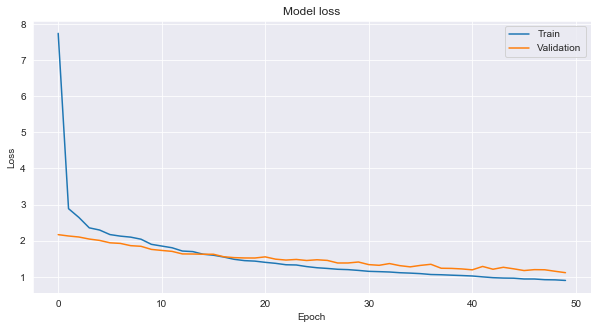

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
fig,ax1=plt.subplots()
fig.set_size_inches(10,5)
history=hs[8]
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

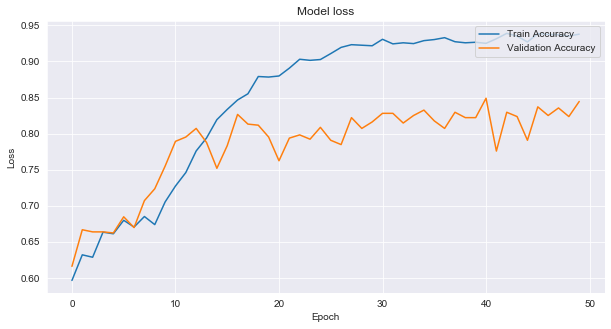

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
fig,ax1=plt.subplots()
fig.set_size_inches(10,5)
history=hs[8]
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()